# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps

# Import API key
from config import api_key
from config import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:

basic_weather_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial" 
url= basic_weather_url + "&appid=" + api_key 


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f6ddef89470e5016f0acbe45743fd0c7'

In [4]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        print('Maximum API call limit reached, waiting 60 seconds')
        time.sleep(60)
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | wahpeton
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | belaya gora
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 

Processing Record 30 of Set 4 | punta alta
Processing Record 31 of Set 4 | te anau
Processing Record 32 of Set 4 | sao filipe
Processing Record 33 of Set 4 | buala
Processing Record 34 of Set 4 | ulkan
Processing Record 35 of Set 4 | pisco
Processing Record 36 of Set 4 | rocha
Processing Record 37 of Set 4 | arraial do cabo
Processing Record 38 of Set 4 | yellowknife
Processing Record 39 of Set 4 | saint-pierre
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | kapit
Processing Record 42 of Set 4 | tairua
Processing Record 43 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | gao
Processing Record 47 of Set 4 | san miguel
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | luxor
Maximum API call limit reached, waiting 60 seconds
Processing Record 0 of Set 5 | havoysund
Processing Record 1 of Set 5 | marsa matruh
Processing Record 2 o

Processing Record 14 of Set 8 | porto novo
Processing Record 15 of Set 8 | muros
Processing Record 16 of Set 8 | qasigiannguit
Processing Record 17 of Set 8 | bay roberts
Processing Record 18 of Set 8 | dingle
Processing Record 19 of Set 8 | tiznit
Processing Record 20 of Set 8 | jiuquan
Processing Record 21 of Set 8 | camana
Processing Record 22 of Set 8 | southbridge
Processing Record 23 of Set 8 | belmonte
Processing Record 24 of Set 8 | eyl
Processing Record 25 of Set 8 | gushikawa
Processing Record 26 of Set 8 | korla
Processing Record 27 of Set 8 | pokaran
Processing Record 28 of Set 8 | henties bay
Processing Record 29 of Set 8 | skhisma
Processing Record 30 of Set 8 | kaeo
Processing Record 31 of Set 8 | kuching
Processing Record 32 of Set 8 | clarence town
Processing Record 33 of Set 8 | esperance
Processing Record 34 of Set 8 | sirjan
Processing Record 35 of Set 8 | aflu
City not found. Skipping...
Processing Record 36 of Set 8 | ust-kamchatsk
City not found. Skipping...
Proc

Processing Record 48 of Set 11 | puerto baquerizo moreno
Processing Record 49 of Set 11 | trat
Maximum API call limit reached, waiting 60 seconds
Processing Record 0 of Set 12 | kloulklubed
Processing Record 1 of Set 12 | bosconia
Processing Record 2 of Set 12 | oxapampa
Processing Record 3 of Set 12 | kinshasa
Processing Record 4 of Set 12 | simao
Processing Record 5 of Set 12 | gairatganj
Processing Record 6 of Set 12 | bowen
Processing Record 7 of Set 12 | tinskoy
Processing Record 8 of Set 12 | tarragona
Processing Record 9 of Set 12 | zhigansk
Processing Record 10 of Set 12 | moree
Processing Record 11 of Set 12 | rio gallegos
Processing Record 12 of Set 12 | saint-augustin
Processing Record 13 of Set 12 | malinovoye ozero
Processing Record 14 of Set 12 | shimizu
Processing Record 15 of Set 12 | dudinka
Processing Record 16 of Set 12 | ravar
Processing Record 17 of Set 12 | talawdi
City not found. Skipping...
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [9]:
# display data frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,63.09,69,0,6.91,US,1643734033
1,namibe,-15.1961,12.1522,75.92,64,22,13.04,AO,1643734033
2,cape town,-33.9258,18.4232,80.89,52,25,1.99,ZA,1643733776
3,mar del plata,-38.0023,-57.5575,78.87,51,0,24.00,AR,1643733885
4,coihaique,-45.5752,-72.0662,67.95,45,75,9.22,CL,1643733757


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#Checking if there are any cities with humidity > 100% 
check_humidity = city_data_pd["Humidity"].describe(include = "all")
print("The max humidity is 100%.  There are no cities that have humidity > 100%")
check_humidity

The max humidity is 100%.  There are no cities that have humidity > 100%


count    545.000000
mean      69.418349
std       22.917636
min        5.000000
25%       55.000000
50%       74.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

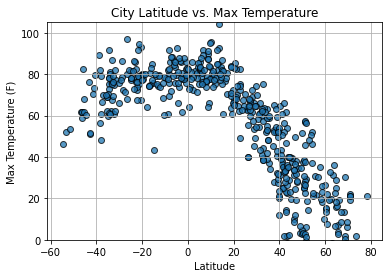

In [16]:
# scatter plot
plt.scatter(city_data_pd["Lat"],city_data_pd["Max Temp"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LattitudeVsTemp.png")

# display the figure
plt.show()

## Latitude vs. Humidity Plot

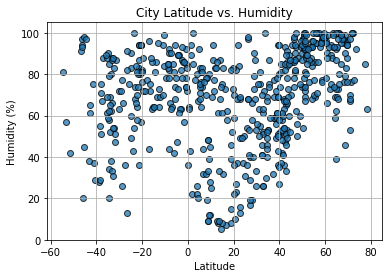

In [17]:
# scatter plot
plt.scatter(city_data_pd["Lat"],city_data_pd["Humidity"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsHumidity.png")

# display the figure
plt.show()

## Latitude vs. Cloudiness Plot

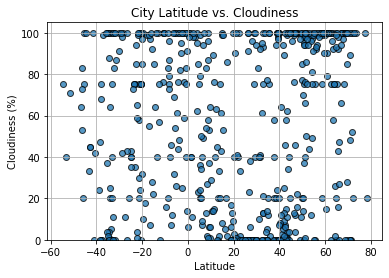

In [18]:
# scatter plot
plt.scatter(city_data_pd["Lat"],city_data_pd["Cloudiness"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsCloudiness.png")

# display the figure
plt.show()

## Latitude vs. Wind Speed Plot

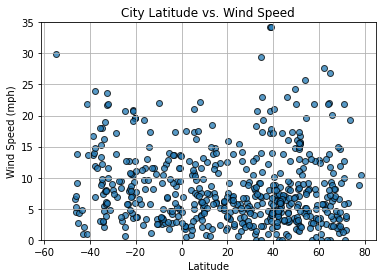

In [19]:
# scatter plot
plt.scatter(city_data_pd["Lat"],city_data_pd["Wind Speed"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# set y limits and grids
plt.ylim(0,35)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsWindSpeed.png")

# display the figure
plt.show()

## Linear Regression

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_pd = city_data_pd.loc[pd.to_numeric(city_data_pd["Lat"]).astype(float) > 0, :]
southern_pd = city_data_pd.loc[pd.to_numeric(city_data_pd["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.45x + 95.78
The r-squared is: -0.8715935514095402
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


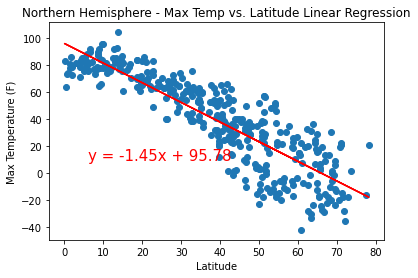

In [24]:
x_values = pd.to_numeric(northern_pd['Lat']).astype(float)
y_values = pd.to_numeric(northern_pd['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.34x + 82.8
The r-squared is: 0.4738559232425565
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


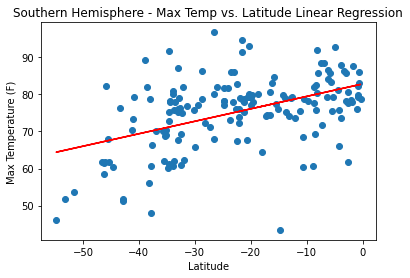

In [25]:
x_values = pd.to_numeric(southern_pd['Lat']).astype(float)
y_values = pd.to_numeric(southern_pd['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.61x + 44.91
The r-squared is: 0.5018821707014115
The regression does not display much of a correlation between the data sets.


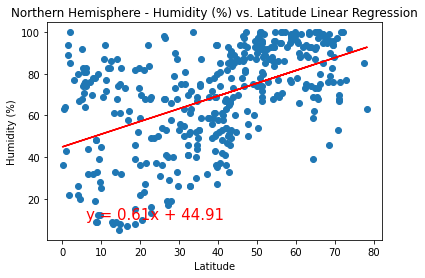

In [26]:
x_values = pd.to_numeric(northern_pd['Lat']).astype(float)
y_values = pd.to_numeric(northern_pd['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.39x + 79.88
The r-squared is: 0.2838661897513145
The regression does not display much of a correlation between the data sets.


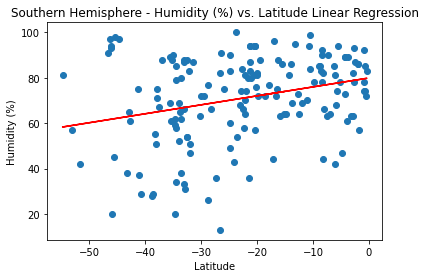

In [27]:
x_values = pd.to_numeric(southern_pd['Lat']).astype(float)
y_values = pd.to_numeric(southern_pd['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.54x + 31.62
The r-squared is: 0.257478547762447
The regression does not display much of a correlation between the data sets.


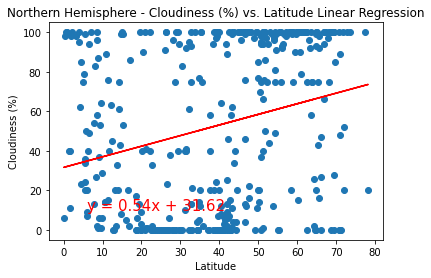

In [28]:
x_values = pd.to_numeric(northern_pd['Lat']).astype(float)
y_values = pd.to_numeric(northern_pd['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.52x + 71.36
The r-squared is: 0.1998416004772385
The regression does not display much of a correlation between the data sets.


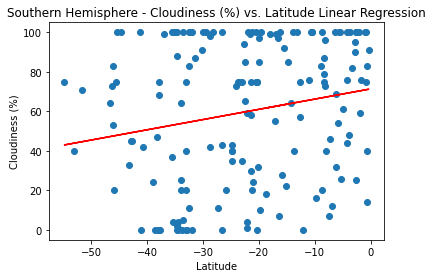

In [31]:
x_values = pd.to_numeric(southern_pd['Lat']).astype(float)
y_values = pd.to_numeric(southern_pd['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 7.44
The r-squared is: 0.034445139763933416
The regression does not display much of a correlation between the data sets.


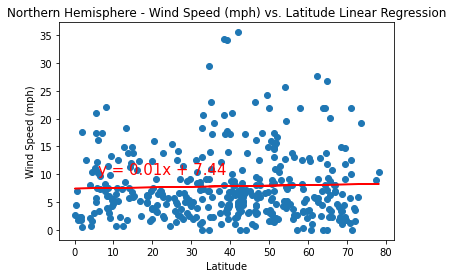

In [29]:
x_values = pd.to_numeric(northern_pd['Lat']).astype(float)
y_values = pd.to_numeric(northern_pd['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 6.9
The r-squared is: -0.25019896653772383
The regression does not display much of a correlation between the data sets.


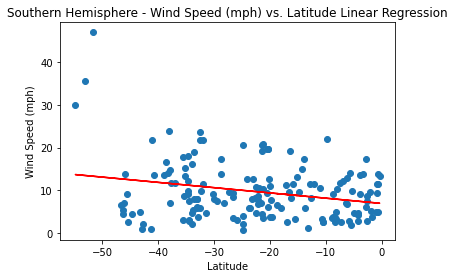

In [30]:
x_values = pd.to_numeric(southern_pd['Lat']).astype(float)
y_values = pd.to_numeric(southern_pd['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()